# Visualizing Chipotle’s Data

This time we are going to pull data directly from the internet. Special
thanks to: https://github.com/justmarkham for sharing the dataset and
materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

### Step 5. Create a histogram of the top 5 items bought

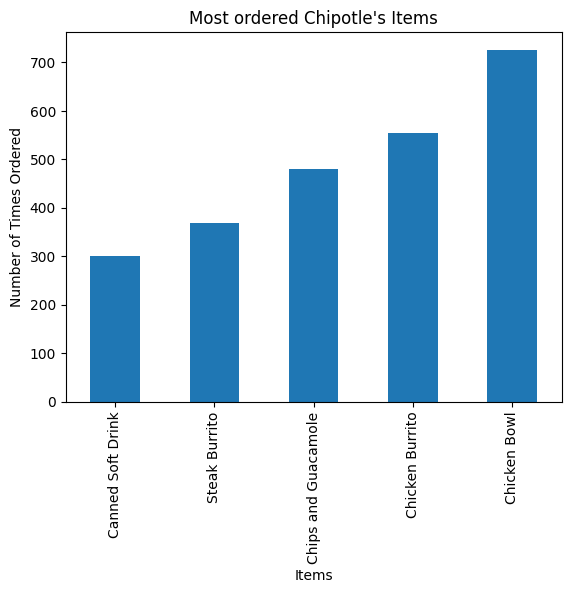

In [5]:
x = chipo.item_name

letter_counts = Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient='index')

df = df[0].sort_values(ascending = True)[45:50]

df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price

#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

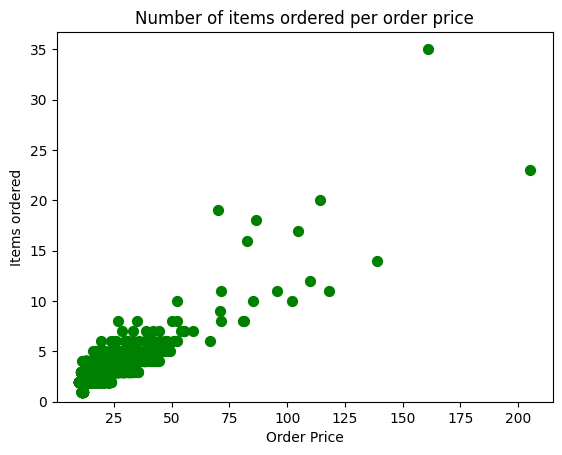

In [6]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space

orders = chipo.groupby('order_id').sum()

plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.

Which menu items have the highest unit prices and how do the number of
orders for these menu items vary?

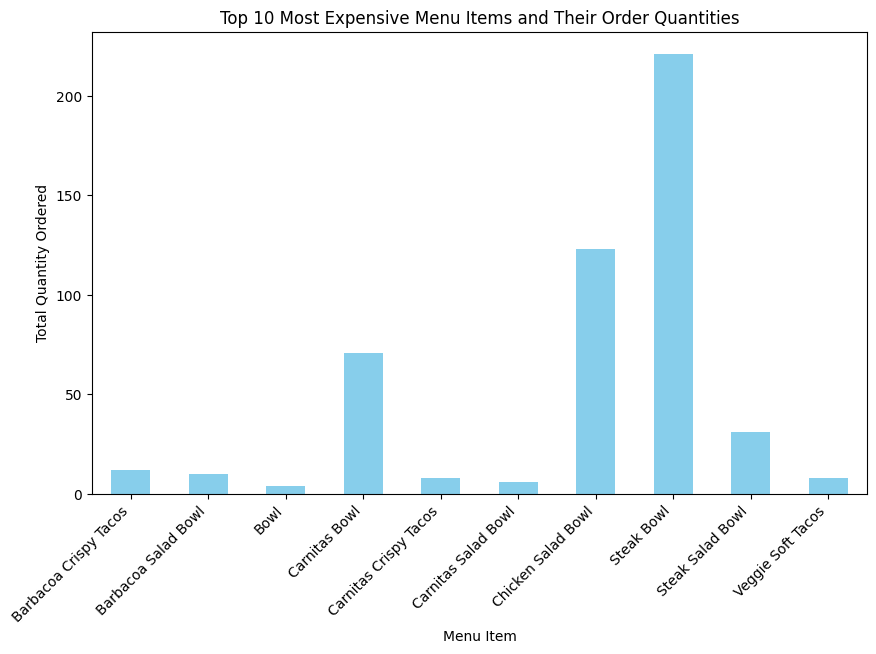

In [8]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

most_expensive_items = chipo.groupby('item_name').item_price.mean().sort_values(ascending=False).head(10)

top_items = chipo[chipo['item_name'].isin(most_expensive_items.index)]
item_order_counts = top_items.groupby('item_name')['quantity'].sum()

fig, ax = plt.subplots(figsize=(10, 6))
item_order_counts.plot(kind='bar', ax=ax, color='skyblue')

ax.set_xlabel('Menu Item')
ax.set_ylabel('Total Quantity Ordered')
ax.set_title('Top 10 Most Expensive Menu Items and Their Order Quantities')

plt.xticks(rotation=45, ha="right")
plt.show()
